<a href="https://colab.research.google.com/github/AmirEfi/Graph-Simulation/blob/master/Simulation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

#Q1

In [108]:
# Q1-Part1: Algebraic Connectivity
nodes = 100
graph_watts = [nx.watts_strogatz_graph(nodes, 4, 0.3)]
graph_erdos = [nx.erdos_renyi_graph(nodes, 0.039)]
graph_barabasi = [nx.barabasi_albert_graph(nodes, 2)]
deg_er = [graph_erdos[0].degree(n) for n in graph_erdos[0]]
deg_wa = [graph_watts[0].degree(n) for n in graph_watts[0]]
deg_ba = [graph_barabasi[0].degree(n) for n in graph_barabasi[0]]
print("Mean of Degrees in ER: ", sum(deg_er) / len(deg_er))
print("Mean of Degrees in Watts: ", sum(deg_wa) / len(deg_wa))
print("Mean of Degrees in Barabasi: ", sum(deg_ba) / len(deg_ba))

alg_connectivity_watts = nx.algebraic_connectivity(graph_watts[0])
alg_connectivity_erdos = nx.algebraic_connectivity(graph_erdos[0])
alg_connectivity_barabasi = nx.algebraic_connectivity(graph_barabasi[0])
print("Algebraic Connectivity of graphs:")
print('Watts-Strogatz: {0} . '.format(alg_connectivity_watts))
print('Erdos-Renyi: {0} . '.format(alg_connectivity_erdos))
print('Barabasi-Albert: {0} .'.format(alg_connectivity_barabasi))

Mean of Degrees in ER:  3.9
Mean of Degrees in Watts:  4.0
Mean of Degrees in Barabasi:  3.92
Algebraic Connectivity of graphs:
Watts-Strogatz: 0.45051130930349825 . 
Erdos-Renyi: 0.0 . 
Barabasi-Albert: 0.546359158339556 .


In [102]:
# Q1-Part2: Spectral Gap
lap_watts = nx.normalized_laplacian_matrix(graph_watts[0])
e_watts = np.linalg.eigvals(lap_watts.toarray())   # compute eigenvalues of matrix.
spect_watts = e_watts[-1] - e_watts[-2]            # compute delta Y

lap_erdos = nx.normalized_laplacian_matrix(graph_erdos[0])
e_erdos = np.linalg.eigvals(lap_erdos.toarray())   # compute eigenvalues of matrix.
spect_erdos = e_erdos[-1] - e_erdos[-2]            # compute delta Y

lap_barabasi = nx.normalized_laplacian_matrix(graph_barabasi[0])
e_barabasi = np.linalg.eigvals(lap_barabasi.toarray())   # compute eigenvalues of matrix.
spect_barabasi = e_barabasi[-1] - e_barabasi[-2]         # compute delta Y

print("Spectral Gap of graphs:")
print('Watts-Strogatz: {0} .'.format(spect_watts))
print('Erdos-Renyi: {0} .'.format(spect_erdos))
print('Barabasi-Albert: {0} .'.format(spect_barabasi))

Spectral Gap of graphs:
Watts-Strogatz: 0.08739036427268698 .
Erdos-Renyi: 0.0 .
Barabasi-Albert: 2.220446049250313e-16 .


In [103]:
# Q1-Part3: Natural Connectivity
sum_natu = 0
for i in range(len(e_watts)):
  sum_natu += (math.exp(e_watts[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_watts = math.log(sum_natu)

sum_natu = 0
for i in range(len(e_erdos)):
  sum_natu += (math.exp(e_erdos[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_erdos = math.log(sum_natu)

sum_natu = 0
for i in range(len(e_barabasi)):
  sum_natu += (math.exp(e_barabasi[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_barabasi = math.log(sum_natu)


print("Natural Connectivity of graphs:")
print('Watts-Strogatz: {0} .'.format(natu_watts))
print('Erdos-Renyi: {0} .'.format(natu_erdos))
print('Barabasi-Albert: {0} .'.format(natu_barabasi))

Natural Connectivity of graphs:
Watts-Strogatz: 1.0986122886681098 .
Erdos-Renyi: 1.0986122886681098 .
Barabasi-Albert: 1.0986122886681098 .


In [104]:
# Q1-Part4: Energy
sum_watts = 0
for i in range(len(e_watts)):
  sum_watts += abs(e_watts[i])

sum_erdos = 0
for i in range(len(e_erdos)):
  sum_erdos += abs(e_erdos[i])

sum_barabasi = 0
for i in range(len(e_barabasi)):
  sum_barabasi += abs(e_barabasi[i])

print("Energy of graphs:")
print('Watts-Strogatz: {0} .'.format(sum_watts))
print('Erdos-Renyi: {0} .'.format(sum_erdos))
print('Barabasi-Albert: {0} .'.format(sum_barabasi))

Energy of graphs:
Watts-Strogatz: 100.0 .
Erdos-Renyi: 98.00000000000001 .
Barabasi-Albert: 100.00000000000001 .


In [105]:
#Q1-Part5: Laplacian Energy
lapSpec_watts = nx.laplacian_spectrum(graph_watts[0])
edges_watts = graph_watts[0].number_of_edges()
list_yi_watts = []
for i in range(len(lapSpec_watts)):
  yi_watts = lapSpec_watts[i] - (2*edges_watts/nodes)
  list_yi_watts.append(yi_watts)
sum_yi_watts = 0
for j in range(len(list_yi_watts)):
  sum_yi_watts += abs(list_yi_watts[j])


lapSpec_erdos = nx.laplacian_spectrum(graph_erdos[0])
edges_erdos = graph_erdos[0].number_of_edges()
list_yi_erdos = []
for i in range(len(lapSpec_erdos)):
  yi_erdos = lapSpec_erdos[i] - (2*edges_erdos/nodes)
  list_yi_erdos.append(yi_erdos)
sum_yi_erdos = 0
for j in range(len(list_yi_erdos)):
  sum_yi_erdos += abs(list_yi_erdos[j])


lapSpec_barabasi = nx.laplacian_spectrum(graph_barabasi[0])
edges_barabasi = graph_barabasi[0].number_of_edges()
list_yi_barabasi = []
for i in range(len(lapSpec_barabasi)):
  yi_barabasi = lapSpec_barabasi[i] - (2*edges_barabasi/nodes)
  list_yi_barabasi.append(yi_barabasi)
sum_yi_barabasi = 0
for j in range(len(list_yi_barabasi)):
  sum_yi_barabasi += abs(list_yi_barabasi[j])

print("Laplacian Energy of graphs:")
print('Watts-Strogatz: {0} .'.format(sum_yi_watts))
print('Erdos-Renyi: {0} .'.format(sum_yi_erdos))
print('Barabasi-Albert: {0} .'.format(sum_yi_barabasi))

Laplacian Energy of graphs:
Watts-Strogatz: 185.8488001127327 .
Erdos-Renyi: 239.05628155005385 .
Barabasi-Albert: 262.46666316313974 .


#Q2

n1 = 15
n2 = 20
d1 = 4
d2 = 3


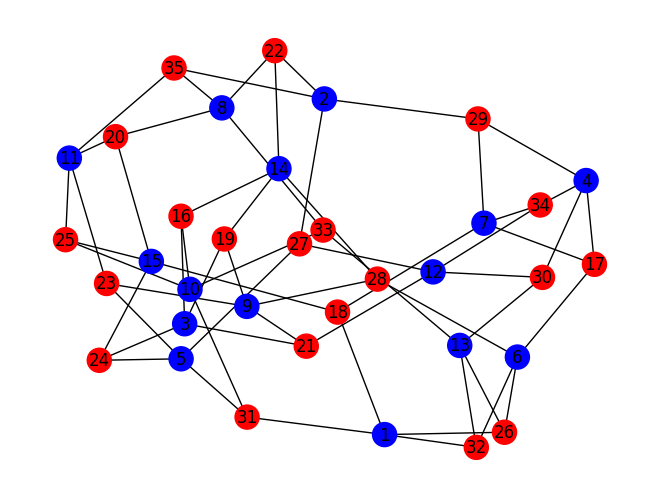

In [15]:
# Q2-Part1: draw RSRBG graph
def isMultiple(i, nd1):
  return nd1 % i == 0

d1 = random.randrange(2, 10)
n1 = random.randrange(10, 30)
n2 = 0
d2 = 0
nd1 = n1 * d1

divisible = [i for i in range(2, nd1) if isMultiple(i, nd1)]

while n2 < d1:
  n2 = random.choice(divisible)
d2 = int(nd1 / n2)

nodes_1 = []
for i in range(1, n1 + 1):
  for j in range(d1):
    nodes_1.append(i)

nodes_2 = []
for i in range(n1 + 1, n1 + n2 + 1):
  for j in range(d2):
    nodes_2.append(i)

print("n1 =", n1)
print("n2 =", n2)
print("d1 =", d1)
print("d2 =", d2)

# draw edges
nodes_visit = set()
len_nodes_1 = len(nodes_1)
len_nodes_2 = len(nodes_2)
RSRBG = nx.Graph()

while len_nodes_1 > 0:
    index1 = random.randrange(len_nodes_1)
    index2 = random.randrange(len_nodes_2)
    del1 = nodes_1[index1 - 1]
    del2 = nodes_2[index2 - 1]

    if del1 not in nodes_visit:
      nodes_visit.add(del1)
      RSRBG.add_node(del1)
    if del2 not in nodes_visit:
      nodes_visit.add(del2)
      RSRBG.add_node(del2)

    if RSRBG.has_edge(del1, del2) is False:
      RSRBG.add_edge(del1, del2)
      nodes_1.pop(index1 - 1)
      nodes_2.pop(index2 - 1)

    len_nodes_1 = len(nodes_1)
    len_nodes_2 = len(nodes_2)


color_map = ['red' if node >= n1 + 1 else 'blue' for node in RSRBG]

nx.draw(RSRBG, node_color=color_map, with_labels=True)

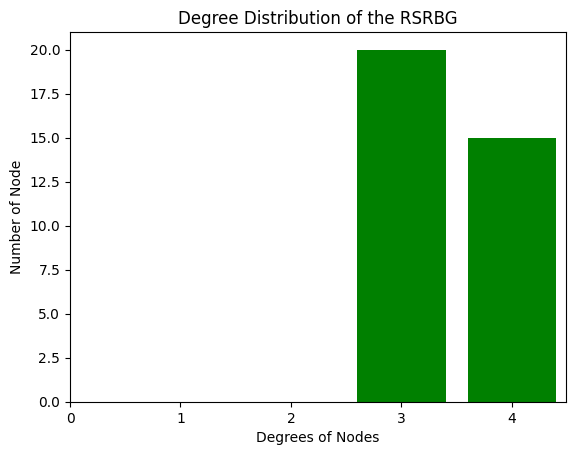

In [16]:
# Q2-Part2: Degree Distribution
degrees = [RSRBG.degree(n) for n in RSRBG.nodes()]
labels, counts = np.unique(degrees, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the RSRBG")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(0,max(d1,d2) + 1))
plt.show()

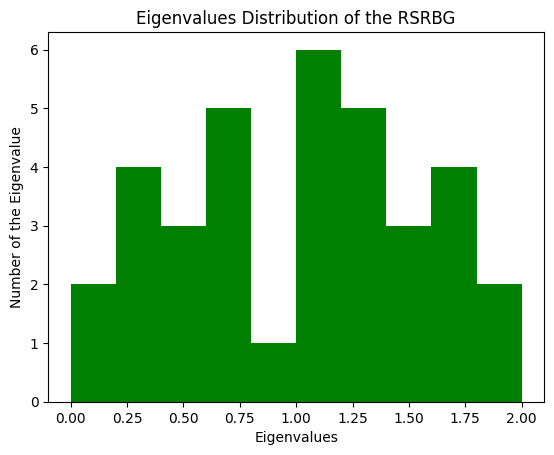

In [18]:
# Q2-Part3: Eigenvalues Distribution
lap_RSRBG = nx.normalized_laplacian_matrix(RSRBG)
e_RSRBG = np.linalg.eigvals(lap_RSRBG.toarray())   # compute eigenvalues of matrix.
plt.hist(e_RSRBG, color='green')
plt.title("Eigenvalues Distribution of the RSRBG")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [19]:
# Q2-Part4: Spectral Gap, Algebraic Connectivity, Natural Connectivity, Symmetry Ratio, Energy, Laplacian Energy
spect_RSRBG = e_RSRBG[-1] - e_RSRBG[-2]
print('Spectral Gap: {0} .'.format(spect_RSRBG))

alg_connectivity_RSRBG = nx.algebraic_connectivity(RSRBG)
print('Algebraic Connectivity: {0} .'.format(alg_connectivity_RSRBG))

sum_natu = 0
for i in range(len(e_RSRBG)):
  sum_natu += (math.exp(e_RSRBG[i]) / (n1+n2))
sum_natu = math.floor(sum_natu)
natu_RSRBG = math.log(sum_natu)
print('Natural Connectivity: {0} .'.format(natu_RSRBG))

e_RSRBG_remDuplic = []
for i in e_RSRBG:
  if i not in e_RSRBG_remDuplic:
    e_RSRBG_remDuplic.append(i)
dia_RSRBG = nx.diameter(RSRBG)
sym_rat_RSRBG = len(e_RSRBG_remDuplic) / (dia_RSRBG + 1)
print('Symmetry Ratio: {0} .'.format(sym_rat_RSRBG))

sum_RSRBG = 0
for i in range(len(e_RSRBG)):
  sum_RSRBG += abs(e_RSRBG[i])
print('Energy: {0} .'.format(sum_RSRBG))

lapSpec_RSRBG = nx.laplacian_spectrum(RSRBG)
edges_RSRBG = RSRBG.number_of_edges()
list_yi_RSRBG = []
for i in range(len(lapSpec_RSRBG)):
  yi_RSRBG = lapSpec_RSRBG[i] - (2*edges_RSRBG/(n1+n2))
  list_yi_RSRBG.append(yi_RSRBG)
sum_yi_RSRBG = 0
for j in range(len(list_yi_RSRBG)):
  sum_yi_RSRBG += abs(list_yi_RSRBG[j])
print('Laplacian Energy: {0} .'.format(sum_yi_RSRBG))


Spectral Gap: 6.661338147750939e-16 .
Algebraic Connectivity: 0.5172164646027312 .
Natural Connectivity: 1.0986122886681098 .
Symmetry Ratio: 5.833333333333333 .
Energy: 35.0 .
Laplacian Energy: 58.727654653599686 .


#Q3

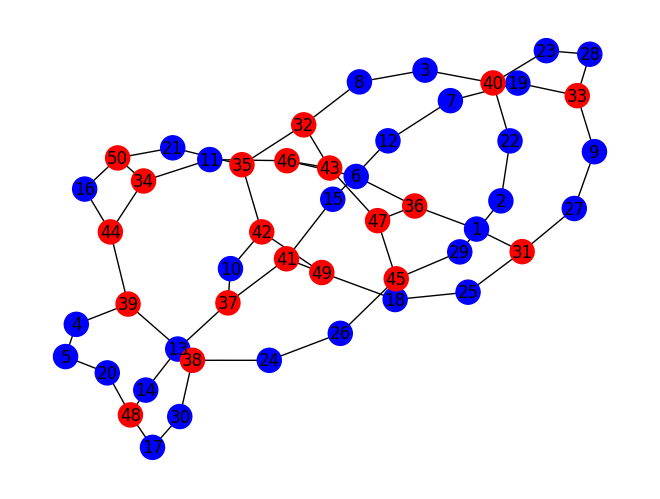

In [20]:
# Q3-Part1: draw RSRG graph
d1_q3 = 2
d2_q3 = 3
p_q3 = 0.4
n_q3 = 50
n1_q3 = math.floor(n_q3 * (1 - p_q3))
n2_q3 = n_q3 - n1_q3

nodes_q3 = list()

for i in range(1, n1_q3 + 1):
  for j in range(d1_q3):
    nodes_q3.append(i)

for i in range(n1_q3 + 1, n1_q3 + n2_q3 + 1):
  for j in range(d2_q3):
    nodes_q3.append(i)

nodes_visit_q3 = set()
len_nodes_q3 = len(nodes_q3)
RSRG = nx.Graph()

while len_nodes_q3 > 1:
    index1 = random.randrange(len_nodes_q3)
    index2 = random.randrange(len_nodes_q3)
    if index1 == index2:
      continue

    del1 = nodes_q3[index1 - 1]
    del2 = nodes_q3[index2 - 1]

    if del1 not in nodes_visit_q3:
      nodes_visit_q3.add(del1)
      RSRG.add_node(del1)
    if del2 not in nodes_visit_q3:
      nodes_visit_q3.add(del2)
      RSRG.add_node(del2)

    if RSRG.has_edge(del1, del2) is False:
      RSRG.add_edge(del1, del2)
      if index2 > index1:
        nodes_q3.pop(index2 - 1)
        nodes_q3.pop(index1 - 1)
      else:
        nodes_q3.pop(index1 - 1)
        nodes_q3.pop(index2 - 1)

    len_nodes_q3 = len(nodes_q3)


color_map = ['red' if node >= n1_q3 + 1 else 'blue' for node in RSRG]

nx.draw(RSRG, node_color=color_map, with_labels=True)




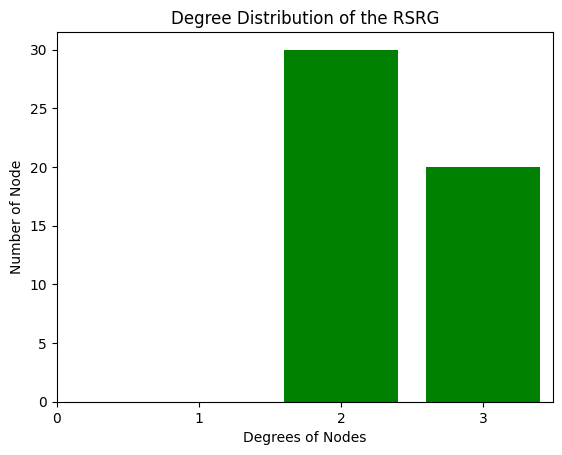

In [21]:
# Q3-Part2: Degree Distribution
degrees_q3 = [RSRG.degree(n) for n in RSRG.nodes()]
labels, counts = np.unique(degrees_q3, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the RSRG")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(0,max(d1_q3,d2_q3) + 1))
plt.show()



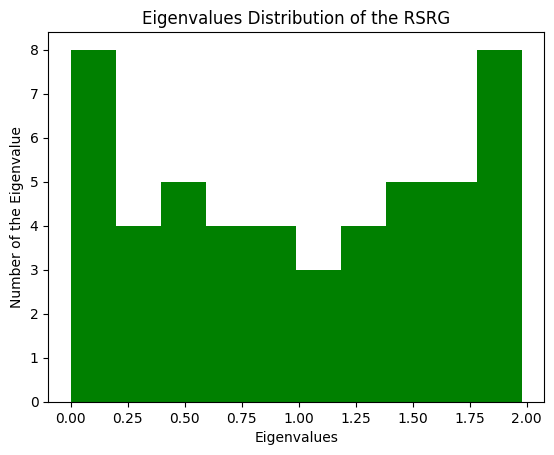

In [22]:
# Q3-Part3: Eigenvalues Distribution
lap_RSRG = nx.normalized_laplacian_matrix(RSRG)
e_RSRG = np.linalg.eigvals(lap_RSRG.toarray())   # compute eigenvalues of matrix.
plt.hist(e_RSRG, color='green')
plt.title("Eigenvalues Distribution of the RSRG")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [23]:
# Q3-Part4: Spectral Gap, Algebraic Connectivity, Natural Connectivity, Symmetry Ratio, Energy, Laplacian Energy
spect_RSRG = e_RSRG[-1] - e_RSRG[-2]
print('Spectral Gap: {0} .'.format(spect_RSRG))

alg_connectivity_RSRG = nx.algebraic_connectivity(RSRG)
print('Algebraic Connectivity: {0} .'.format(alg_connectivity_RSRG))

sum_natu = 0
for i in range(len(e_RSRG)):
  sum_natu += (math.exp(e_RSRG[i]) / (n1_q3+n2_q3))
sum_natu = math.floor(sum_natu)
natu_RSRG = math.log(sum_natu)
print('Natural Connectivity: {0} .'.format(natu_RSRG))

e_RSRG_remDuplic = []
for i in e_RSRG:
  if i not in e_RSRG_remDuplic:
    e_RSRG_remDuplic.append(i)
dia_RSRG = nx.diameter(RSRG)
sym_rat_RSRG = len(e_RSRG_remDuplic) / (dia_RSRG + 1)
print('Symmetry Ratio: {0} .'.format(sym_rat_RSRG))

sum_RSRG = 0
for i in range(len(e_RSRG)):
  sum_RSRG += abs(e_RSRG[i])
print('Energy: {0} .'.format(sum_RSRG))

lapSpec_RSRG = nx.laplacian_spectrum(RSRG)
edges_RSRG = RSRG.number_of_edges()
list_yi_RSRG = []
for i in range(len(lapSpec_RSRG)):
  yi_RSRG = lapSpec_RSRG[i] - (2*edges_RSRG/(n1_q3+n2_q3))
  list_yi_RSRG.append(yi_RSRG)
sum_yi_RSRG = 0
for j in range(len(list_yi_RSRG)):
  sum_yi_RSRG += abs(list_yi_RSRG[j])
print('Laplacian Energy: {0} .'.format(sum_yi_RSRG))

Spectral Gap: -0.019069607187604753 .
Algebraic Connectivity: 0.08717413797468418 .
Natural Connectivity: 1.0986122886681098 .
Symmetry Ratio: 3.8461538461538463 .
Energy: 50.00000000000005 .
Laplacian Energy: 70.65061126240352 .


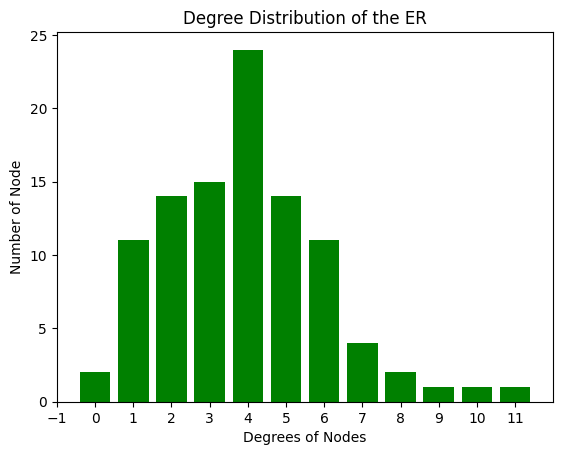

In [109]:
# Q3-Part5: ER Degree Distribution
degrees_ER = [graph_erdos[0].degree(n) for n in graph_erdos[0].nodes()]
labels, counts = np.unique(degrees_ER, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the ER")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(min(degrees_ER) - 1, max(degrees_ER) + 1))
plt.show()

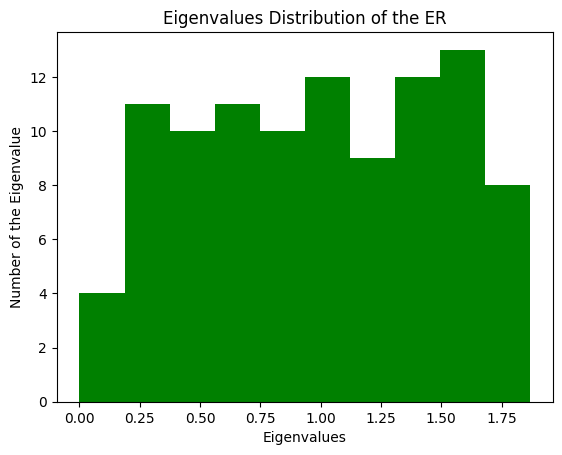

In [110]:
# Q3-Part6: ER Eigenvalues Distribution
plt.hist(e_erdos, color='green')
plt.title("Eigenvalues Distribution of the ER")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [27]:
# Q3-Part7: compute Algebraic Connectivity Distribution
d1_q3 = 2
d2_q3 = 3
n_q3 = 500
number_of_simu = 1000
alg_simu = list()
given_p = [0.125, 0.25, 0.5, 0.75, 1]

for z in range(number_of_simu):
  p_q3 = random.choice(given_p)
  n1_q3 = math.floor(n_q3 * (1 - p_q3))
  n2_q3 = n_q3 - n1_q3

  nodes_q3 = list()

  for i in range(1, n1_q3 + 1):
    for j in range(d1_q3):
      nodes_q3.append(i)

  for i in range(n1_q3 + 1, n1_q3 + n2_q3 + 1):
    for j in range(d2_q3):
      nodes_q3.append(i)

  nodes_visit_q3 = set()
  len_nodes_q3 = len(nodes_q3)
  RSRG_alg = nx.Graph()

  while len_nodes_q3 > 1:
      index1 = random.randrange(len_nodes_q3)
      index2 = random.randrange(len_nodes_q3)
      if index1 == index2:
        continue

      if len(nodes_visit_q3) == 500:
         break

      del1 = nodes_q3[index1 - 1]
      del2 = nodes_q3[index2 - 1]

      if del1 not in nodes_visit_q3:
        nodes_visit_q3.add(del1)
        RSRG_alg.add_node(del1)
      if del2 not in nodes_visit_q3:
        nodes_visit_q3.add(del2)
        RSRG_alg.add_node(del2)

      if RSRG_alg.has_edge(del1, del2) is False:
        RSRG_alg.add_edge(del1, del2)
        if index2 > index1:
          nodes_q3.pop(index2 - 1)
          nodes_q3.pop(index1 - 1)
        else:
          nodes_q3.pop(index1 - 1)
          nodes_q3.pop(index2 - 1)

      len_nodes_q3 = len(nodes_q3)

  alg_simu.append(nx.algebraic_connectivity(RSRG_alg))



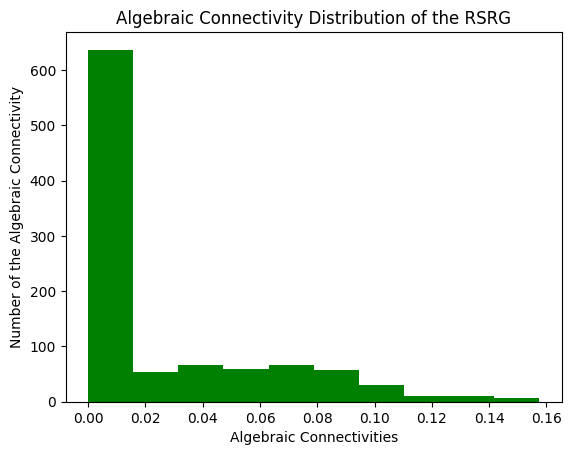

In [28]:
# Q3-Part7: draw Algebraic Connectivity Distribution
plt.hist(alg_simu, color='green')
plt.title("Algebraic Connectivity Distribution of the RSRG")
plt.xlabel("Algebraic Connectivities")
plt.ylabel("Number of the Algebraic Connectivity")
plt.show()

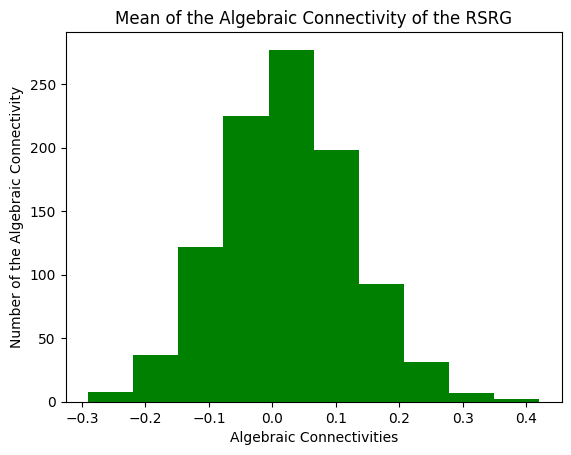

In [29]:
# Q3-Part8: Mean of the Algebraic Connectivity using Monte-Carlo simulation
avg = sum(alg_simu) / len(alg_simu)
num_reps = 1000
std_dev = 0.1
pdf_alg = np.random.normal(avg, std_dev, num_reps).round(2)
plt.hist(pdf_alg, color='green')
plt.title("Mean of the Algebraic Connectivity of the RSRG")
plt.xlabel("Algebraic Connectivities")
plt.ylabel("Number of the Algebraic Connectivity")
plt.show()

#Q4

In [30]:
# Q4-Part1: check isomorphic

iso_check = "not "
line_graph_ws = nx.line_graph(graph_watts[0])
if nx.is_isomorphic(graph_watts[0], line_graph_ws):
  iso_check = ""
print(f"WS graph and its line graph are {iso_check}isomorphic")

iso_check = "not "
line_graph_er = nx.line_graph(graph_erdos[0])
if nx.is_isomorphic(graph_erdos[0], line_graph_er):
  iso_check = ""
print(f"ER graph and its line graph are {iso_check}isomorphic")

iso_check = "not "
line_graph_sf = nx.line_graph(graph_barabasi[0])
if nx.is_isomorphic(graph_barabasi[0], line_graph_sf):
  iso_check = ""
print(f"SF graph and its line graph are {iso_check}isomorphic")

iso_check = "not "
line_graph_rsrbg = nx.line_graph(RSRBG)
if nx.is_isomorphic(RSRBG, line_graph_rsrbg):
  iso_check = ""
print(f"RSRBG graph and its line graph are {iso_check}isomorphic")

iso_check = "not "
line_graph_rsrg = nx.line_graph(RSRG)
if nx.is_isomorphic(RSRG, line_graph_rsrg):
  iso_check = ""
print(f"RSRG graph and its line graph are {iso_check}isomorphic")

WS graph and its line graph are not isomorphic
ER graph and its line graph are not isomorphic
SF graph and its line graph are not isomorphic
RSRBG graph and its line graph are not isomorphic
RSRG graph and its line graph are not isomorphic


SF:


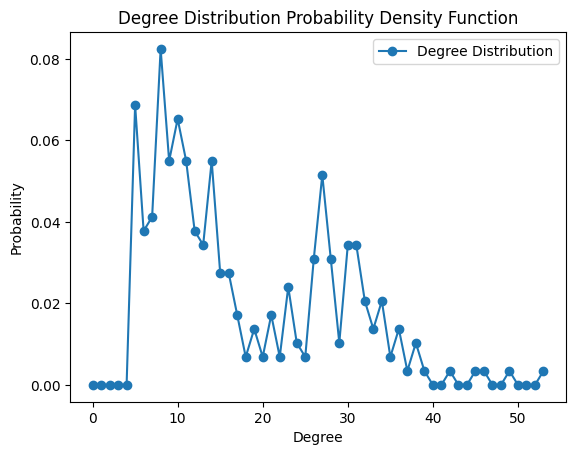

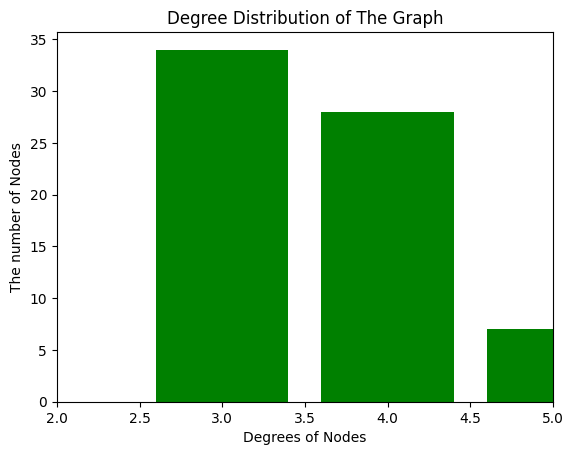

WS:


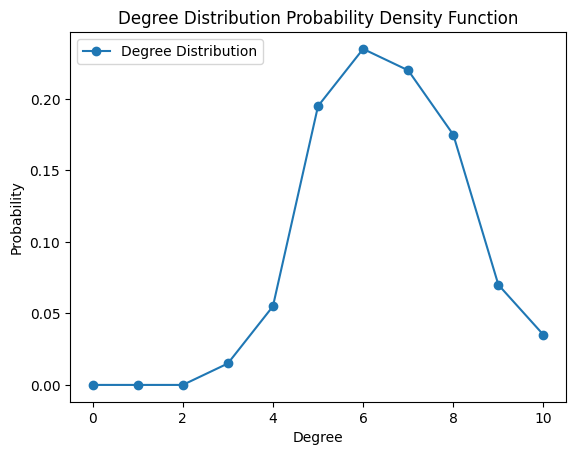

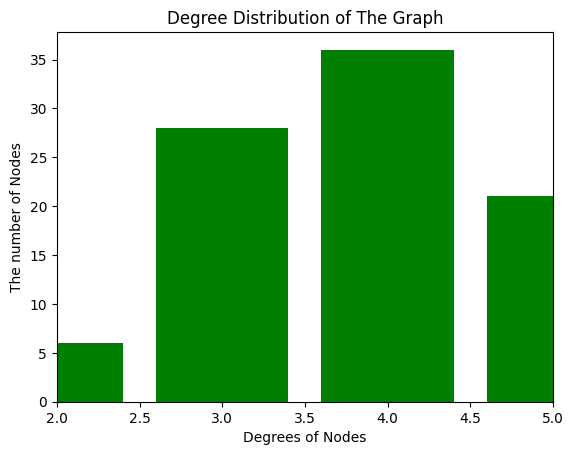

ER:


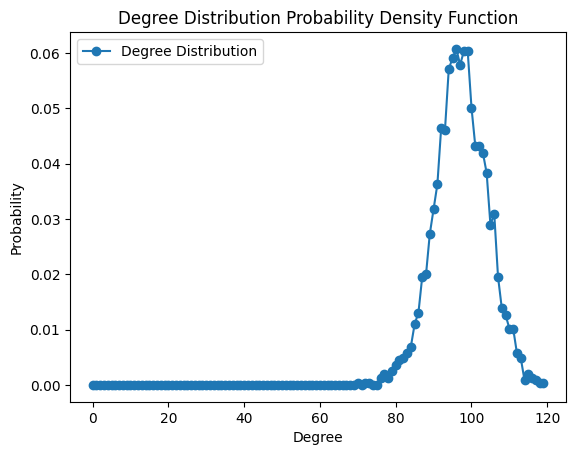

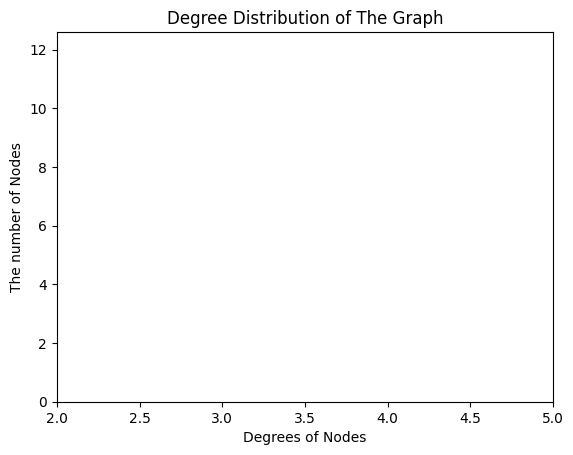

RSRBG:


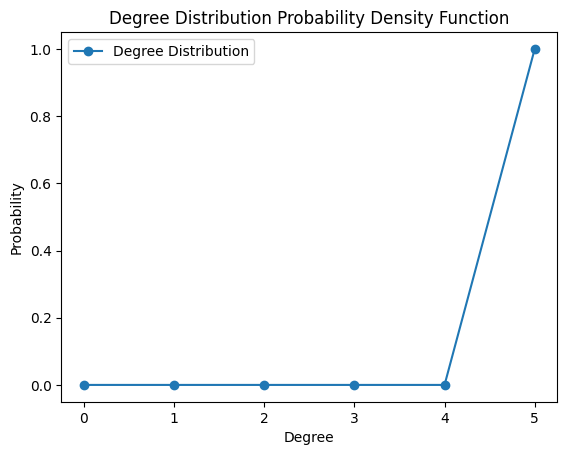

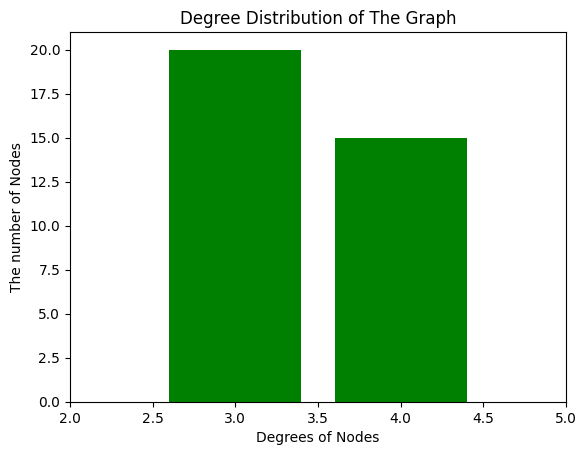

RSRG:


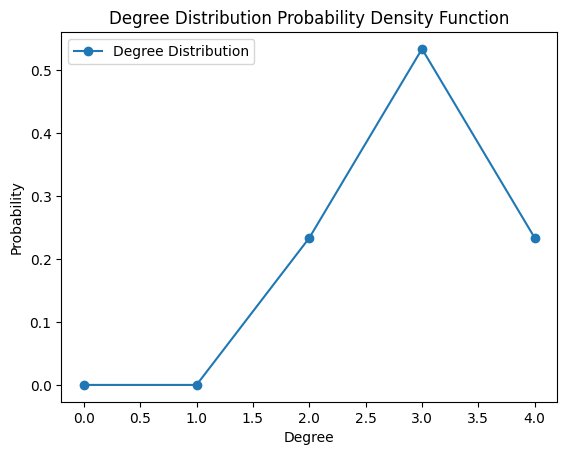

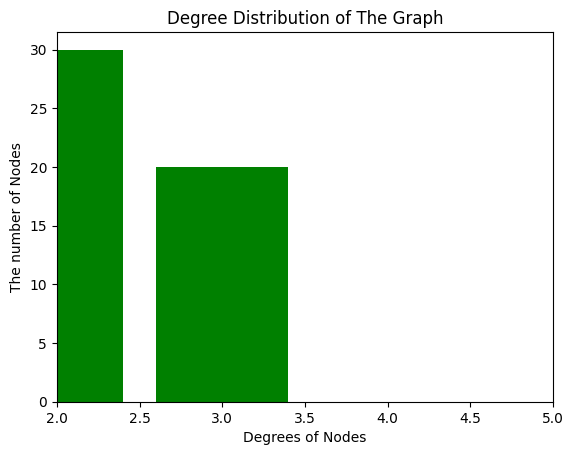

In [31]:
#Q4-Part2: PDF of degree distribution

def plot_degree_distribution_pdf(G):
    degrees = [degree for node, degree in G.degree()]
    degree_counts = np.bincount(degrees)
    degree_probs = degree_counts / np.sum(degree_counts)

    plt.plot(range(len(degree_probs)), degree_probs, 'o-', label='Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution Probability Density Function')
    plt.legend()
    plt.show()


def plot_degree_distribution(G):
  degrees = [G.degree(n) for n in G.nodes()]
  labels, counts = np.unique(degrees, return_counts=True)
  plt.bar(labels, counts, color='green', align='center')
  plt.title("Degree Distribution of The Graph")
  plt.xlabel("Degrees of Nodes")
  plt.ylabel("The number of Nodes")
  plt.xlim(min(d1,d2) - 1 , max(d1,d2) + 1)
  plt.show()


# Scale-Free (SF) Model
#sf_model = nx.scale_free_graph(1000)
#line_sf_model = nx.line_graph(sf_model)
print("SF:")
plot_degree_distribution_pdf(line_graph_sf)
plot_degree_distribution(graph_barabasi[0])

# Watts-Strogatz (WS) Model
#ws_model = nx.watts_strogatz_graph(1000, 4, 0.1)
#line_ws_model = nx.line_graph(ws_model)
print("WS:")
plot_degree_distribution_pdf(line_graph_ws)
plot_degree_distribution(graph_watts[0])

# (ER) Model
#er_model = nx.erdos_renyi_graph(1000, 0.01)
#line_er_model = nx.line_graph(er_model)
print("ER:")
plot_degree_distribution_pdf(line_graph_er)
plot_degree_distribution(graph_erdos[0])

#RSRBG Model
print("RSRBG:")
plot_degree_distribution_pdf(line_graph_rsrbg)
plot_degree_distribution(RSRBG)

#RSRG Model
print("RSRG:")
plot_degree_distribution_pdf(line_graph_rsrg)
plot_degree_distribution(RSRG)

SF:
line graph:


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


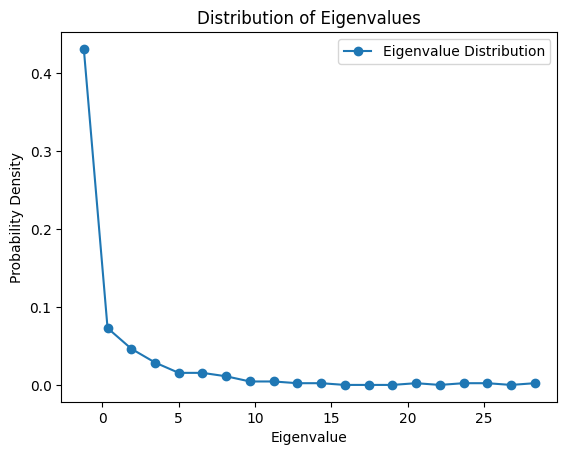

original:


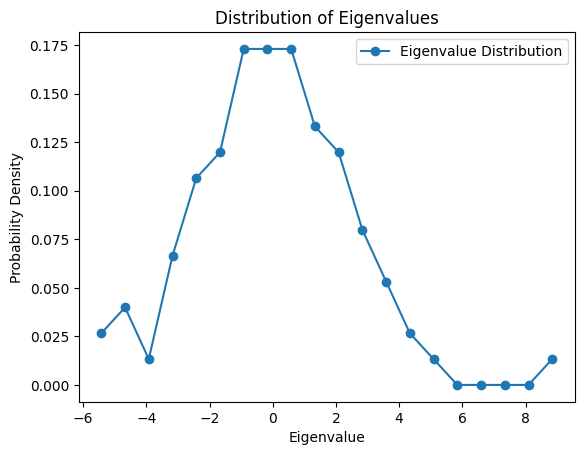

WS:
line graph:


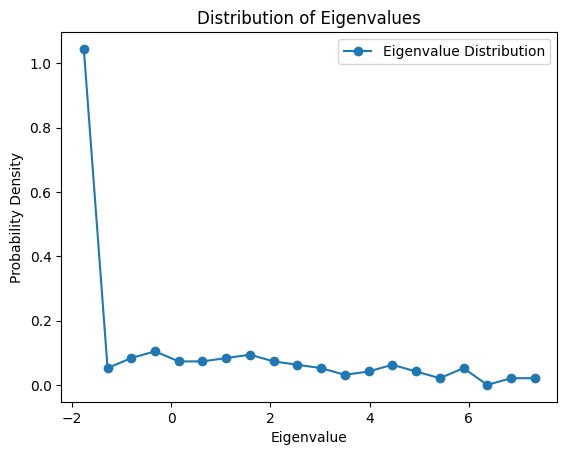

original:


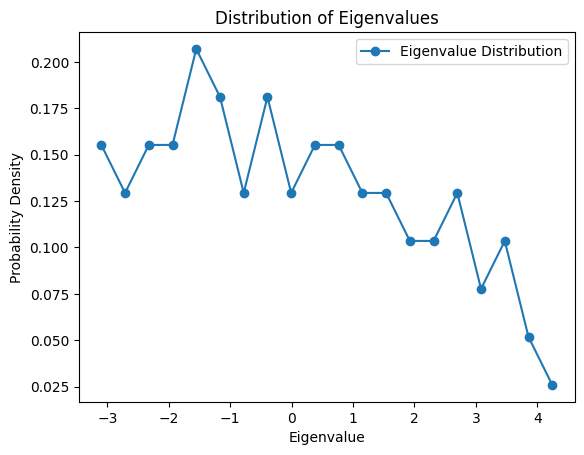

ER:
line graph:


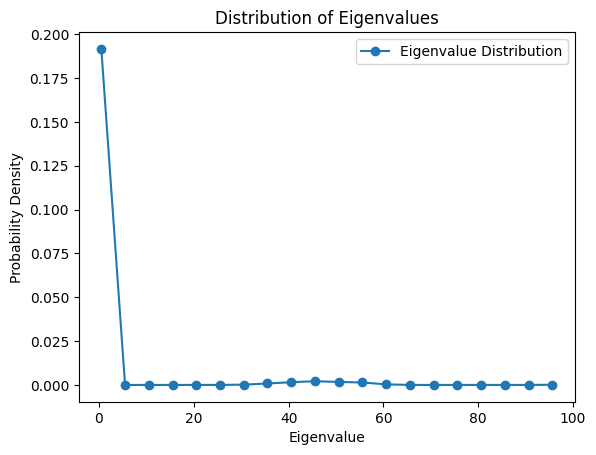

original:


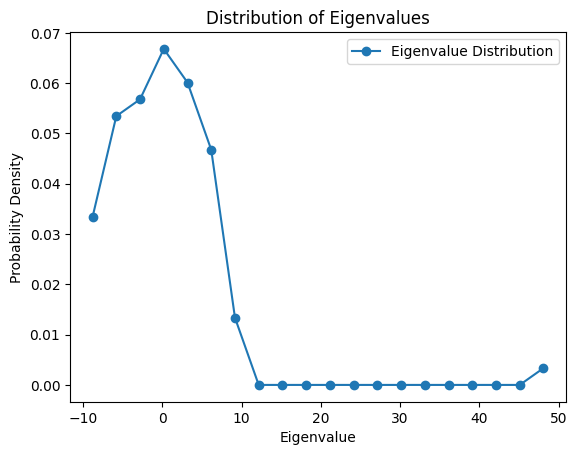

RSRBG:
line graph:


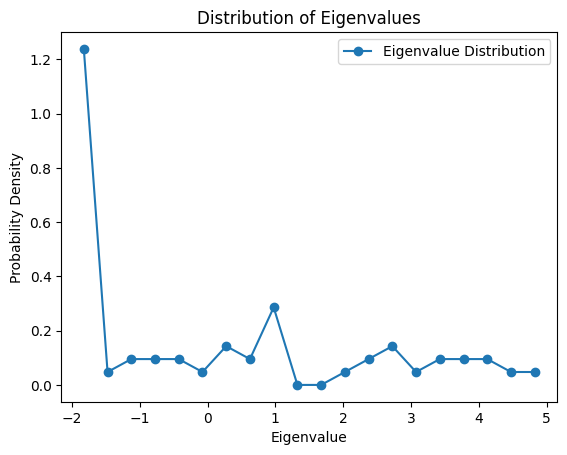

original:


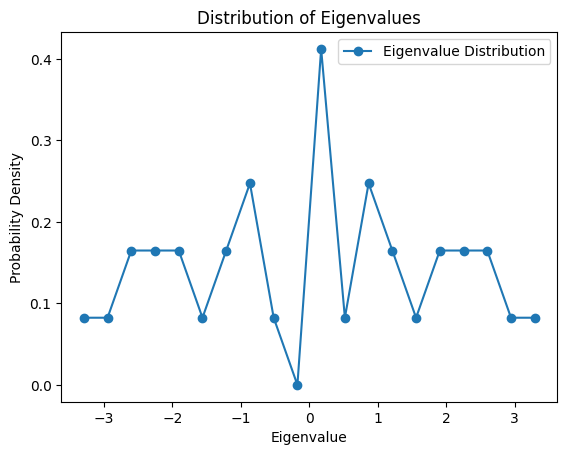

RSRG:
line graph:


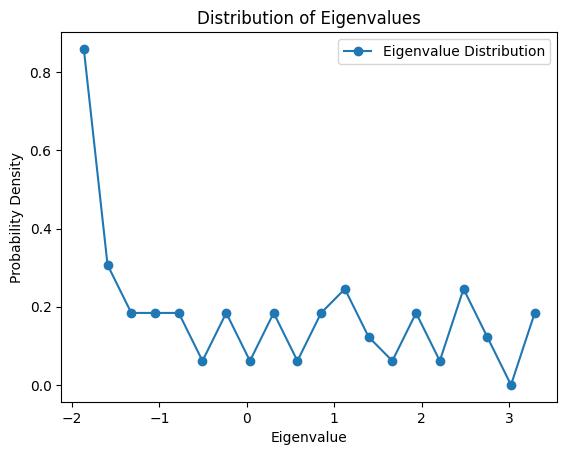

original:


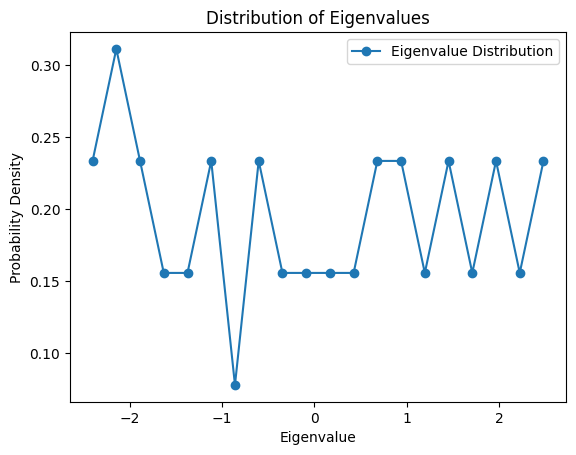

In [32]:
#Q4-Part3: PDF of eigenvalue distribution
def plot_eigenvalue_distribution_pdf(G):
    eigenvalues = np.linalg.eigvals(nx.to_numpy_array(G))
    eigenvalue_counts, bins = np.histogram(eigenvalues, bins=20, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, eigenvalue_counts, 'o-', label='Eigenvalue Distribution')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.title('Distribution of Eigenvalues')
    plt.legend()
    plt.show()

#ُSF Model
print("SF:")
print("line graph:")
plot_eigenvalue_distribution_pdf(line_graph_sf)
print("original:")
plot_eigenvalue_distribution_pdf(graph_barabasi[0])

# Watts-Strogatz (WS) Model
print("WS:")
print("line graph:")
plot_eigenvalue_distribution_pdf(line_graph_ws)
print("original:")
plot_eigenvalue_distribution_pdf(graph_watts[0])

# (ER) Model
print("ER:")
print("line graph:")
plot_eigenvalue_distribution_pdf(line_graph_er)
print("original:")
plot_eigenvalue_distribution_pdf(graph_erdos[0])

#RSRBG Model
print("RSRBG:")
print("line graph:")
plot_eigenvalue_distribution_pdf(line_graph_rsrbg)
print("original:")
plot_eigenvalue_distribution_pdf(RSRBG)

#RSRG Model
print("RSRG:")
print("line graph:")
plot_eigenvalue_distribution_pdf(line_graph_rsrg)
print("original:")
plot_eigenvalue_distribution_pdf(RSRG)

#Q5

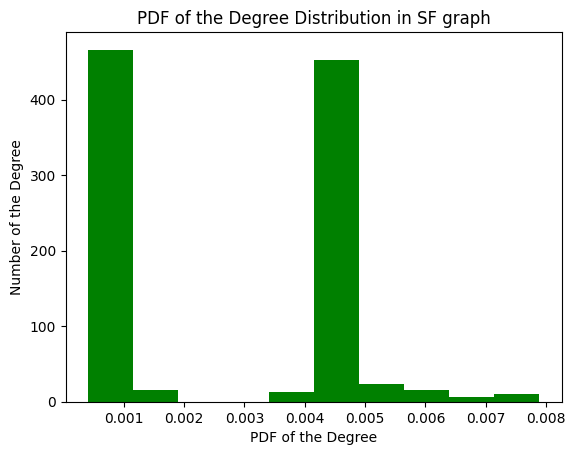

In [33]:
# Q5-Part1: PDF in Scale-Free graph
def rem_dup(degrees):
  remDeg = list()
  for i in degrees:
    if i not in remDeg:
      remDeg.append(i)
  return remDeg

nodes_q5 = 500
k = 4
gamma = [2,3]
pdf_all = list()
for i in range(1000):
  pdf_deg = list()
  SF_graph = nx.barabasi_albert_graph(nodes_q5, k)
  degrees = [SF_graph.degree(n) for n in SF_graph.nodes()]
  remDupDeg = rem_dup(degrees)
  tmp_ga = random.choice(gamma)
  for j in range(len(remDupDeg)):
    mean_deg = math.pow((remDupDeg[j]+2), -tmp_ga)
    pdf_deg.append(mean_deg)

  pdf_all.append(sum(pdf_deg)/len(pdf_deg))

plt.hist(pdf_all, color='green')
plt.title("PDF of the Degree Distribution in SF graph")
plt.xlabel("PDF of the Degree")
plt.ylabel("Number of the Degree")
plt.show()

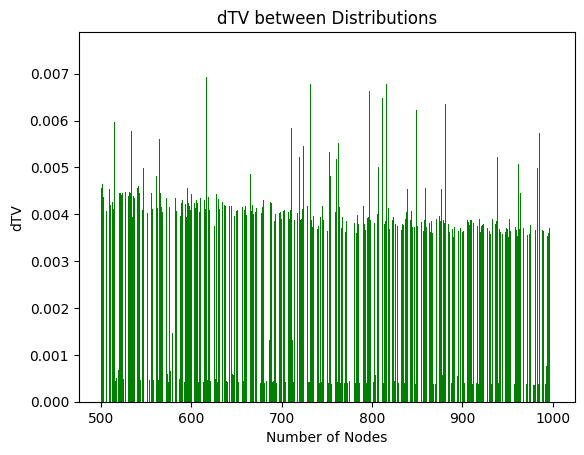

In [34]:
# Q5-Part2: dTV between PDFs
pdf_all = list()
for i in range(1000):
  pdf_deg = list()
  nodes_q5 = random.randrange(500,1000)
  SF_graph = nx.barabasi_albert_graph(nodes_q5, k)
  degrees = [SF_graph.degree(n) for n in SF_graph.nodes()]
  remDupDeg = rem_dup(degrees)
  tmp_ga = random.choice(gamma)
  for j in range(len(remDupDeg)):
    mean_deg = math.pow((remDupDeg[j]+2), -tmp_ga)
    pdf_deg.append(mean_deg)

  pdf_all.append([sum(pdf_deg)/len(pdf_deg), nodes_q5])

df = pd.DataFrame(pdf_all, columns=['PDF', 'Nodes'])
plt.bar(df["Nodes"], df["PDF"], color='green')
plt.title("dTV between Distributions")
plt.xlabel("Number of Nodes")
plt.ylabel("dTV")
plt.show()

#Q6

In [35]:
# Q6-Part1: for 6-regular graph
alg_connectivities1 = []
edge_connectivities1 = []
node_connectivities1 = []

def simulate_disconnection1(n, k, num_of_tests):

  disconnect_count = 0
  #create 6-regular graph
  Gr = nx.random_regular_graph(k, n)

  for _ in range(num_of_tests):

    #select random edge to cut
    edge_list = list(Gr.edges)
    random_edge = random.choice(edge_list)
    Gr.remove_edge(*random_edge)

    #check if the graph is disconnected
    if not nx.is_connected(Gr):
      disconnect_count += 1

    #calucate algebretic,node,edge connectivity

    #alg_connectivities1.append(nx.algebraic_connectivity(Gr)) *
    #edge_connectivities1.append(nx.edge_connectivity(Gr))  *
    #node_connectivities1.append(nx.node_connectivity(Gr))  *

  probability_of_disconnection = disconnect_count / num_of_tests
  return probability_of_disconnection

num_nodes = 500
num_edges = 1500
degree = 6
num_of_tests = 700

probability_of_d = simulate_disconnection1(num_nodes, degree, num_of_tests)
print(f"Probability of disconnectedness for {degree}-regular graph: {probability_of_d}")
print(f"Algebretic connectivities: {alg_connectivities1}")
print(f"Edge connectivities: {edge_connectivities1}")
print(f"Node connectivities: {node_connectivities1}")

Probability of disconnectedness for 6-regular graph: 0.10714285714285714
Algebretic connectivities: []
Edge connectivities: []
Node connectivities: []


In [36]:
# Q6-Part2: for RSRBG(4,12)
alg_connectivities2 = []
edge_connectivities2 = []
node_connectivities2 = []

def simulate_disconnection2(num_of_tests2):

  disconnect_count = 0
  #create RSRBG(4,12) graph
  n = 500
  d1 = 4
  d2 = 12
  n1 = int(n*d2 / (d1 + d2))
  n2 = int(n*d1 / (d1 + d2))

  nodes_1 = []
  for i in range(1, n1 + 1):
    for j in range(d1):
      nodes_1.append(i)

  nodes_2 = []
  for i in range(n1 + 1, n1 + n2 + 1):
    for j in range(d2):
      nodes_2.append(i)

  # draw edges
  nodes_visit = set()
  len_nodes_1 = len(nodes_1)
  len_nodes_2 = len(nodes_2)
  RSRBG = nx.Graph()

  while len_nodes_1 > 0:
      index1 = random.randrange(len_nodes_1)
      index2 = random.randrange(len_nodes_2)
      del1 = nodes_1[index1 - 1]
      del2 = nodes_2[index2 - 1]

      if del1 not in nodes_visit:
        nodes_visit.add(del1)
        RSRBG.add_node(del1)
      if del2 not in nodes_visit:
        nodes_visit.add(del2)
        RSRBG.add_node(del2)

      if RSRBG.has_edge(del1, del2) is False:
        RSRBG.add_edge(del1, del2)
        nodes_1.pop(index1 - 1)
        nodes_2.pop(index2 - 1)

      len_nodes_1 = len(nodes_1)
      len_nodes_2 = len(nodes_2)

  for _ in range(num_of_tests2):

    #select random edge to cut
    edge_list = list(RSRBG.edges)
    random_edge = random.choice(edge_list)
    RSRBG.remove_edge(*random_edge)

    #check if the graph is disconnected
    if not nx.is_connected(RSRBG):
      disconnect_count += 1

    #calucate algebretic,node,edge connectivity

    #alg_connectivities2.append(nx.algebraic_connectivity(Gr)) *
    #edge_connectivities2.append(nx.edge_connectivity(Gr))  *
    #node_connectivities2.append(nx.node_connectivity(Gr))  *

  probability_of_disconnection = disconnect_count / num_of_tests2
  return probability_of_disconnection

num_of_tests = 700

probability_of_d2 = simulate_disconnection2(num_of_tests)
print(f"Probability of disconnectedness for RSRBG(4,12): {probability_of_d2}")
print(f"Algebretic connectivities: {alg_connectivities1}")
print(f"Edge connectivities: {edge_connectivities1}")
print(f"Node connectivities: {node_connectivities1}")

Probability of disconnectedness for RSRBG(4,12): 0.5785714285714286
Algebretic connectivities: []
Edge connectivities: []
Node connectivities: []


#Q7

In [37]:
# Q7-Part1
def estimate_girth(G):
    cycles = nx.cycle_basis(G)
    len_of_cycles = []
    for c in cycles:
      len_of_cycles.append(len(c))

    if len(cycles) == 0:
        return float('inf')  # No cycles found, graph is acyclic
    else:
        return min(len_of_cycles)

print("Grith of:")
print(f"SF Model: {estimate_girth(graph_barabasi[0])}")
print(f"ER Model: {estimate_girth(graph_erdos[0])}")
print(f"WS Model: {estimate_girth(graph_watts[0])}")
print(f"RSRBG Model: {estimate_girth(RSRBG)}")
print(f"RSRG Model: {estimate_girth(RSRG)}")

print(f"SF Line Grapg: {estimate_girth(line_graph_sf)}")
print(f"ER line Graph: {estimate_girth(line_graph_er)}")
print(f"WS line Graph: {estimate_girth(line_graph_ws)}")
print(f"RSRBG Line Graph: {estimate_girth(line_graph_rsrbg)}")
print(f"RSRG Line Graph: {estimate_girth(line_graph_rsrg)}")
print("RSRBG model has max girth")

Grith of:
SF Model: 3
ER Model: 3
WS Model: 3
RSRBG Model: 4
RSRG Model: 4
SF Line Grapg: 3
ER line Graph: 3
WS line Graph: 3
RSRBG Line Graph: 3
RSRG Line Graph: 3
RSRBG model has max girth


**Q7-Part2**

1.Grith:
 *   Strength: A graph with a smaller girth is likely to have a higher strength
     since shorter cycles provide alternative paths and redundancies. Removing nodes or edges from a graph with a smaller girth is less likely to disconnect the graph or increase its vulnerability.
 *   Algebretic connectivity: In general, graphs with a smaller girth tend to
     have a higher algebraic connectivity since shorter cycles contribute to a more connected graph structure.

2.Cage:
 *   Strength: The cage concept can indirectly influence the strength by
     providing insights into the minimum number of nodes required to achieve a specific girth. This information can guide the design of robust and resilient graph structures.
 *   Algebretic connectivity: The cage concept is related to the girth, and as
     mentioned earlier, graphs with a smaller girth tend to have a higher algebraic connectivity. Therefore, the cage can indirectly influence the algebraic connectivity by providing a lower bound on the number of nodes required to achieve a specific girth.
bold text

In [ ]:
# Q7-Part3
def create_rsrbg():
  n = 8
  d1 = 2
  d2 = 6
  n1 = int(n*d2 / (d1 + d2))
  n2 = int(n*d1 / (d1 + d2))

  nodes_1 = []
  for i in range(1, n1 + 1):
    for j in range(d1):
      nodes_1.append(i)

  nodes_2 = []
  for i in range(n1 + 1, n1 + n2 + 1):
    for j in range(d2):
      nodes_2.append(i)

  # draw edges
  nodes_visit = set()
  len_nodes_1 = len(nodes_1)
  len_nodes_2 = len(nodes_2)
  RSRBG = nx.Graph()

  while len_nodes_1 > 0:
      index1 = random.randrange(len_nodes_1)
      index2 = random.randrange(len_nodes_2)
      del1 = nodes_1[index1 - 1]
      del2 = nodes_2[index2 - 1]

      if del1 not in nodes_visit:
        nodes_visit.add(del1)
        RSRBG.add_node(del1)
      if del2 not in nodes_visit:
        nodes_visit.add(del2)
        RSRBG.add_node(del2)

      if RSRBG.has_edge(del1, del2) is False:
        RSRBG.add_edge(del1, del2)
        nodes_1.pop(index1 - 1)
        nodes_2.pop(index2 - 1)

      len_nodes_1 = len(nodes_1)
      len_nodes_2 = len(nodes_2)

  return RSRBG

def create_rsrg():
  d1_q3 = 2
  d2_q3 = 6
  p_q3 = 0.5
  n_q3 = 8
  n1_q3 = math.floor(n_q3 * (1 - p_q3))
  n2_q3 = n_q3 - n1_q3

  nodes_q3 = list()

  for i in range(1, n1_q3 + 1):
    for j in range(d1_q3):
      nodes_q3.append(i)

  for i in range(n1_q3 + 1, n1_q3 + n2_q3 + 1):
    for j in range(d2_q3):
      nodes_q3.append(i)

  nodes_visit_q3 = set()
  len_nodes_q3 = len(nodes_q3)
  RSRG = nx.Graph()

  while len_nodes_q3 > 1:
      index1 = random.randrange(len_nodes_q3)
      index2 = random.randrange(len_nodes_q3)
      if index1 == index2:
        continue

      del1 = nodes_q3[index1 - 1]
      del2 = nodes_q3[index2 - 1]

      if del1 not in nodes_visit_q3:
        nodes_visit_q3.add(del1)
        RSRG.add_node(del1)
      if del2 not in nodes_visit_q3:
        nodes_visit_q3.add(del2)
        RSRG.add_node(del2)

      if RSRG.has_edge(del1, del2) is False:
        RSRG.add_edge(del1, del2)
        if index2 > index1:
          nodes_q3.pop(index2 - 1)
          nodes_q3.pop(index1 - 1)
        else:
          nodes_q3.pop(index1 - 1)
          nodes_q3.pop(index2 - 1)

      len_nodes_q3 = len(nodes_q3)
  return RSRG

RSRBG_Q7 = create_rsrbg()
RSRG_Q7 = create_rsrg()
cubicalG = nx.cubical_graph()
print(f"Grith of RSRBG Model: {estimate_girth(RSRBG_Q7)}")
print(f"Grith of RSRG Model: {estimate_girth(RSRG_Q7)}")
print(f"Grith of Cubical Graph: {estimate_girth(cubicalG)}")

Grith of RSRBG Model: 4
Grith of RSRG Model: 1
Grith of Cubical Graph: 4


#Q8

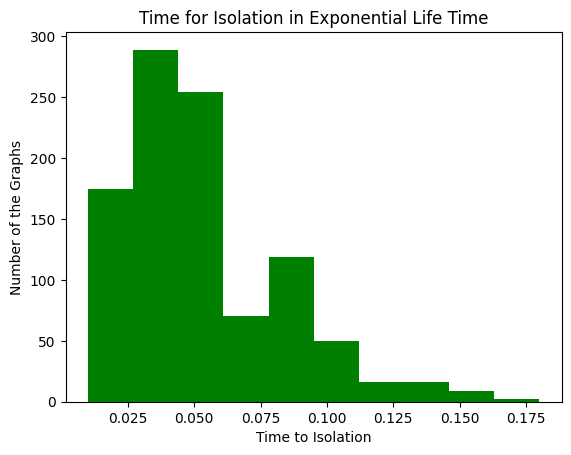

In [40]:
# Q8-Part1: Exponential Life Time
n = 100
r = 2
k = 4
exp_times = list()

for _ in range(1000):
  nodes_q8 = list()
  for i in range(n):
    t = np.random.exponential()
    nodes_q8.append(t)

  g = nx.random_regular_graph(k, n)

  passed_time = 0.0
  for i in range(200):

    for j in range(len(nodes_q8)):
      if j >= len(nodes_q8):
        continue
      if g.has_node(j) is False:
        continue
      if nodes_q8[j] <= passed_time:
        g.remove_node(j)
        nodes_q8.pop(j)

    degrees_g = [g.degree(n) for n in g.nodes()]
    if r in degrees_g:
      exp_times.append(passed_time)
      break

    passed_time += 0.01


plt.hist(exp_times, color='green')
plt.title("Time for Isolation in Exponential Life Time")
plt.xlabel("Time to Isolation")
plt.ylabel("Number of the Graphs")
plt.show()

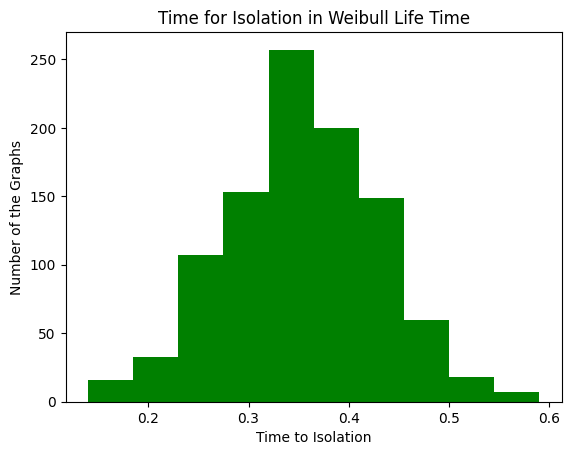

In [42]:
# Q8-Part2: Weibull Life Time
n = 100
r = 2
k = 4
exp_times = list()

for _ in range(1000):
  nodes_q8 = list()
  for i in range(n):
    t = np.random.weibull(3)
    nodes_q8.append(t)

  g = nx.random_regular_graph(k, n)

  passed_time = 0.0
  for i in range(200):

    for j in range(len(nodes_q8)):
      if j >= len(nodes_q8):
        continue
      if g.has_node(j) is False:
        continue
      if nodes_q8[j] <= passed_time:
        g.remove_node(j)
        nodes_q8.pop(j)

    degrees_g = [g.degree(n) for n in g.nodes()]
    if r in degrees_g:
      exp_times.append(passed_time)
      break

    passed_time += 0.01


plt.hist(exp_times, color='green')
plt.title("Time for Isolation in Weibull Life Time")
plt.xlabel("Time to Isolation")
plt.ylabel("Number of the Graphs")
plt.show()

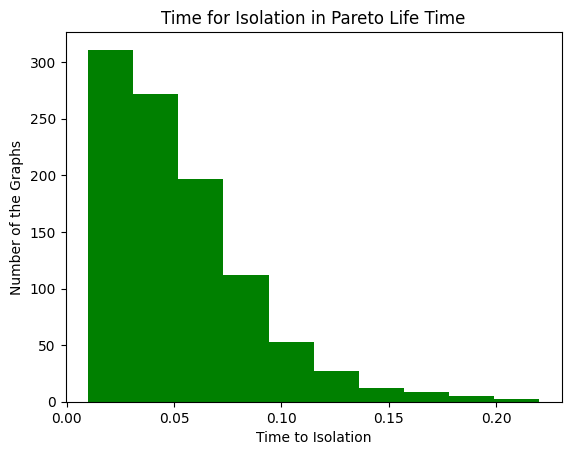

In [45]:
# Q8-Part3: Pareto Life Time
n = 100
r = 2
k = 4
exp_times = list()

for _ in range(1000):
  nodes_q8 = list()
  for i in range(n):
    t = np.random.pareto(1)
    nodes_q8.append(t)

  g = nx.random_regular_graph(k, n)

  passed_time = 0.0
  for i in range(200):

    for j in range(len(nodes_q8)):
      if j >= len(nodes_q8):
        continue
      if g.has_node(j) is False:
        continue
      if nodes_q8[j] <= passed_time:
        g.remove_node(j)
        nodes_q8.pop(j)

    degrees_g = [g.degree(n) for n in g.nodes()]
    if r in degrees_g:
      exp_times.append(passed_time)
      break

    passed_time += 0.01


plt.hist(exp_times, color='green')
plt.title("Time for Isolation in Pareto Life Time")
plt.xlabel("Time to Isolation")
plt.ylabel("Number of the Graphs")
plt.show()

#Q9

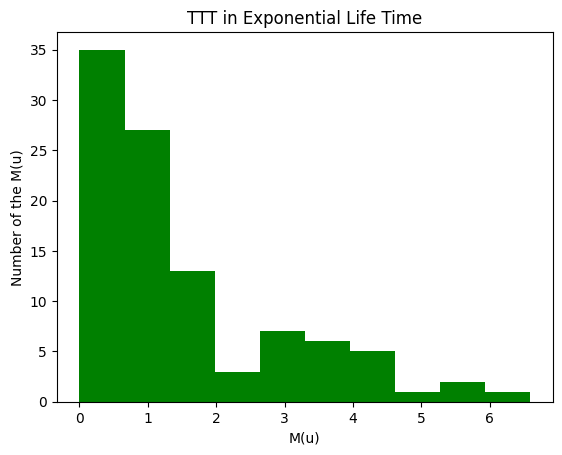

In [115]:
# Q9-Part1: draw TTT diagram - Exponential Life Time
n = 100
life_t = list()
for i in range(n):
    t = np.random.exponential()
    life_t.append(t)

M_ttt = list()
for i in range(n):
  M_ttt.append(life_t[i] / life_t[-1])

plt.hist(M_ttt, color='green')
plt.title("TTT in Exponential Life Time")
plt.xlabel("M(u)")
plt.ylabel("Number of the M(u)")
plt.show()

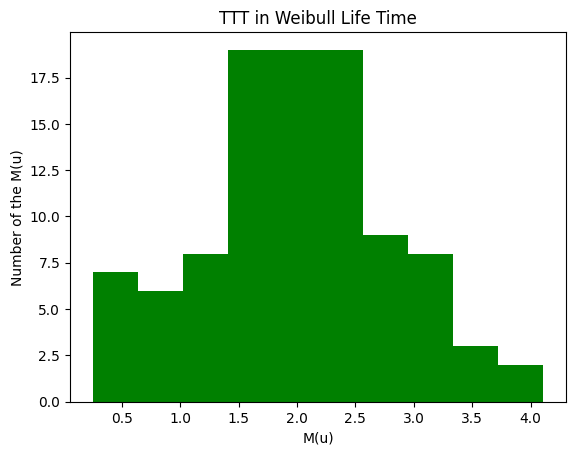

In [116]:
# Q9-Part2: draw TTT diagram - Weibull Life Time
n = 100
life_t = list()
for i in range(n):
    t = np.random.weibull(3)
    life_t.append(t)

M_ttt = list()
for i in range(n):
  M_ttt.append(life_t[i] / life_t[-1])

plt.hist(M_ttt, color='green')
plt.title("TTT in Weibull Life Time")
plt.xlabel("M(u)")
plt.ylabel("Number of the M(u)")
plt.show()

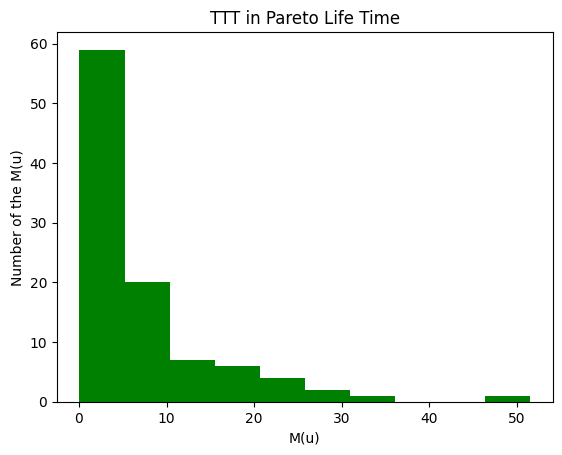

In [119]:
# Q9-Part3: draw TTT diagram - Pareto Life Time
n = 100
life_t = list()
for i in range(n):
    t = np.random.pareto(3)
    life_t.append(t)

M_ttt = list()
for i in range(n):
  M_ttt.append(life_t[i] / life_t[-1])

plt.hist(M_ttt, color='green')
plt.title("TTT in Pareto Life Time")
plt.xlabel("M(u)")
plt.ylabel("Number of the M(u)")
plt.show()